Checking out the weather forecast for the next 4 days in Arlington, VA

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# download the web page containing forecast
page = requests.get("https://forecast.weather.gov/MapClick.php?lat=38.8905&lon=-77.0863#.XLp5aOhKjIU")

# create BS object to parse the page
soup = BeautifulSoup(page.content, 'html.parser')

# find the div with id seven-day-forecast
seven_day = soup.find(id="seven-day-forecast")

# find the individ forecast items inside seven_day
forecast_items = seven_day.find_all(class_="tombstone-container")

# print the first forecast item
tonight = forecast_items[0]
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  NOW until
  <br/>
  1:00pm Sat
 </p>
 <p>
  <img alt="" class="forecast-icon" src="newimages/medium/nshra.png" title=""/>
 </p>
 <p class="short-desc">
  Coastal Flood Advisory
 </p>
</div>


In [3]:
# Select all items with the class period-name inside an item with the class tombstone-container in seven_day.

period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['NOW until1:00pm Sat',
 'Tonight',
 'Saturday',
 'SaturdayNight',
 'Sunday',
 'SundayNight',
 'Monday',
 'MondayNight',
 'Tuesday']

In [4]:
# grabbing the 3 other fields -- short-desc, temp and img

short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['Coastal Flood Advisory', 'ScatteredShowers', 'Slight ChanceShowers thenPartly Sunny', 'Mostly Cloudythen ChanceShowers', 'ChanceShowers', 'ChanceShowers', 'Slight ChanceShowers', 'Partly Cloudy', 'Mostly Sunny']
['Low: 61 °F', 'High: 71 °F', 'Low: 51 °F', 'High: 65 °F', 'Low: 50 °F', 'High: 71 °F', 'Low: 56 °F', 'High: 80 °F']
['', 'Tonight: Scattered showers.  Cloudy, with a low around 61. Southeast wind around 15 mph, with gusts as high as 30 mph.  Chance of precipitation is 40%.', 'Saturday: A slight chance of showers before 11am.  Cloudy, then gradually becoming mostly sunny, with a high near 71. South wind 15 to 18 mph, with gusts as high as 36 mph.  Chance of precipitation is 20%.', 'Saturday Night: A chance of showers after 2am.  Mostly cloudy, with a low around 51. South wind 6 to 11 mph becoming light. Winds could gust as high as 22 mph.  Chance of precipitation is 30%.', 'Sunday: A chance of showers.  Mostly cloudy, with a high near 65. Southwest wind 5 to 7 mph.  Chance of

In [5]:
# no temp data for first period

temps.insert(0, np.nan)

In [6]:
# creating a dataframe

import pandas as pd
weather = pd.DataFrame({
        "period": periods[1:],
         "short_desc": short_descs[1:],
         "temp": temps[1:],
         "desc":descs[1:]
    })
weather

,period,short_desc,temp,desc
0,Tonight,ScatteredShowers,Low: 61 °F,"Tonight: Scattered showers. Cloudy, with a lo..."
1,Saturday,Slight ChanceShowers thenPartly Sunny,High: 71 °F,Saturday: A slight chance of showers before 11...
2,SaturdayNight,Mostly Cloudythen ChanceShowers,Low: 51 °F,Saturday Night: A chance of showers after 2am....
3,Sunday,ChanceShowers,High: 65 °F,"Sunday: A chance of showers. Mostly cloudy, w..."
4,SundayNight,ChanceShowers,Low: 50 °F,Sunday Night: A chance of showers. Mostly clo...
5,Monday,Slight ChanceShowers,High: 71 °F,Monday: A slight chance of showers. Partly su...
6,MondayNight,Partly Cloudy,Low: 56 °F,"Monday Night: Partly cloudy, with a low around..."
7,Tuesday,Mostly Sunny,High: 80 °F,"Tuesday: Mostly sunny, with a high near 80."


In [7]:
# grabbing the numeric temps for some data analysis
temp_nums = weather["temp"].str.extract("(?P<temp_num>\d+)", expand=False)
weather["temp_num"] = temp_nums.astype('int')
temp_nums

0    61
1    71
2    51
3    65
4    50
5    71
6    56
7    80
Name: temp_num, dtype: object

In [8]:
weather.head()

,period,short_desc,temp,desc,temp_num
0,Tonight,ScatteredShowers,Low: 61 °F,"Tonight: Scattered showers. Cloudy, with a lo...",61
1,Saturday,Slight ChanceShowers thenPartly Sunny,High: 71 °F,Saturday: A slight chance of showers before 11...,71
2,SaturdayNight,Mostly Cloudythen ChanceShowers,Low: 51 °F,Saturday Night: A chance of showers after 2am....,51
3,Sunday,ChanceShowers,High: 65 °F,"Sunday: A chance of showers. Mostly cloudy, w...",65
4,SundayNight,ChanceShowers,Low: 50 °F,Sunday Night: A chance of showers. Mostly clo...,50


In [9]:
weather['temp_num'].mean()

63.125

Text(0.5, 1.0, 'Temperatures Across Periods')

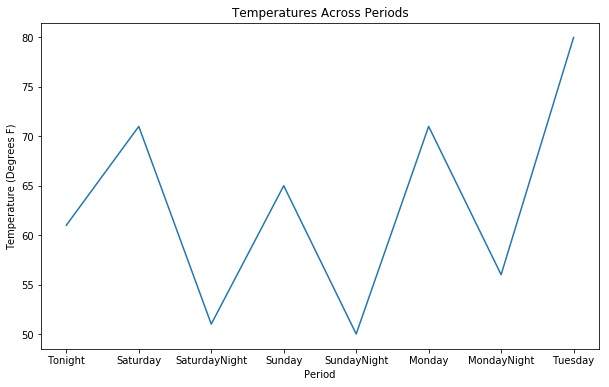

In [10]:
plt.figure(figsize = (10,6))
plt.tight_layout()
plt.plot(weather['period'], weather['temp_num'])
plt.xlabel('Period')
plt.ylabel('Temperature (Degrees F)')
plt.title('Temperatures Across Periods')